(functions)=
```{raw} html
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

# Functions

```{index} single: Python; User-defined functions
```

```{contents} Contents
:depth: 2
```

## Overview

One construct that's extremely useful and provided by almost all programming
languages is **functions**.

We have already met several functions, such as

* the `sqrt()` function from NumPy and
* the built-in `print()` function

In this lecture we'll treat functions systematically and begin to learn just how
useful and important they are.

One of the things we will learn to do is build our own user-defined functions

We will use the following imports.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Function Basics

A function is a named section of a program that implements a specific task.

Many functions exist already and we can use them off the shelf.

First we review these functions and then discuss how we can build our own.

### Built-In Functions

Python has a number of *built-in* functions that are available without `import`.

We have already met some

In [2]:
max(19, 20)

20

In [3]:
print('foobar')

foobar


In [4]:
str(22)

'22'

In [5]:
type(22)

int

Two more useful built-in functions are `any()` and `all()`

In [6]:
bools = False, True, True
all(bools)  # True if all are True and False otherwise

False

In [7]:
any(bools)  # False if all are False and True otherwise

True

The full list of Python built-ins is [here](https://docs.python.org/library/functions.html).

### Third Party Functions

If the built-in functions don't cover what we need, we either need to import
functions or create our own.

Examples of importing and using functions
were given in the {doc}`previous lecture <python_by_example>`

Here's another one, which tests whether a given year is a leap year:

In [8]:
import calendar

calendar.isleap(2020)

True

## Defining Functions

In many instances, it is useful to be able to define our own functions.

This will become clearer as you see more examples.

Let's start by discussing how it's done.

### Syntax

Here's a very simple Python function, that implements the mathematical function
$f(x) = 2 x + 1$

In [9]:
def f(x):
    return 2 * x + 1

Now that we've *defined* this function, let's *call* it and check whether it
does what we expect:

In [10]:
f(1)

3

In [11]:
f(10)

21

Here's a longer function, that computes the absolute value of a given number.

(Such a function already exists as a built-in, but let's write our own for the
exercise.)

In [12]:
def new_abs_function(x):

    if x < 0:
        abs_value = -x
    else:
        abs_value = x

    return abs_value

Let's review the syntax here.

* `def` is a Python keyword used to start function definitions.
* `def new_abs_function(x):` indicates that the function is called `new_abs_function` and that it has a single argument `x`.
* The indented code is a code block called the *function body*.
* The `return` keyword indicates that `abs_value` is the object that should be returned to the calling code.

This whole function definition is read by the Python interpreter and stored in memory.

Let's call it to check that it works:

In [13]:
print(new_abs_function(3))
print(new_abs_function(-3))

3
3


### Why Write Functions?

User-defined functions are important for improving the clarity of your code by

* separating different strands of logic
* facilitating code reuse

(Writing the same thing twice is [almost always a bad idea](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself))

We will say more about this {doc}`later <writing_good_code>`.

## Applications

### Random Draws

Consider again this code from the {doc}`previous lecture <python_by_example>`

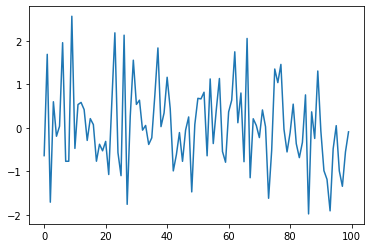

In [14]:
ts_length = 100
ϵ_values = []   # empty list

for i in range(ts_length):
    e = np.random.randn()
    ϵ_values.append(e)

plt.plot(ϵ_values)
plt.show()

We will break this program into two parts:

1. A user-defined function that generates a list of random variables.
1. The main part of the program that
    1. calls this function to get data
    1. plots the data

This is accomplished in the next program

(funcloopprog)=

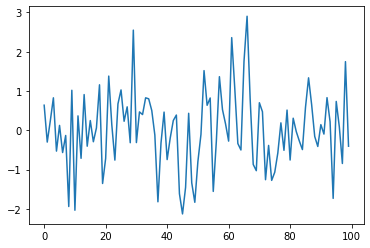

In [15]:
def generate_data(n):
    ϵ_values = []
    for i in range(n):
        e = np.random.randn()
        ϵ_values.append(e)
    return ϵ_values

data = generate_data(100)
plt.plot(data)
plt.show()

When the interpreter gets to the expression `generate_data(100)`, it executes the function body with `n` set equal to 100.

The net result is that the name `data` is *bound* to the list `ϵ_values` returned by the function.

### Adding Conditions

```{index} single: Python; Conditions
```

Our function `generate_data()` is rather limited.

Let's make it slightly more useful by giving it the ability to return either standard normals or uniform random variables on $(0, 1)$ as required.

This is achieved in the next piece of code.

(funcloopprog2)=

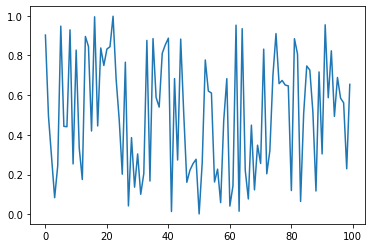

In [16]:
def generate_data(n, generator_type):
    ϵ_values = []
    for i in range(n):
        if generator_type == 'U':
            e = np.random.uniform(0, 1)
        else:
            e = np.random.randn()
        ϵ_values.append(e)
    return ϵ_values

data = generate_data(100, 'U')
plt.plot(data)
plt.show()

Hopefully, the syntax of the if/else clause is self-explanatory, with indentation again delimiting the extent of the code blocks.

Notes

* We are passing the argument `U` as a string, which is why we write it as `'U'`.
* Notice that equality is tested with the `==` syntax, not `=`.
    * For example, the statement `a = 10` assigns the name `a` to the value `10`.
    * The expression `a == 10` evaluates to either `True` or `False`, depending on the value of `a`.

Now, there are several ways that we can simplify the code above.

For example, we can get rid of the conditionals all together by just passing the desired generator type *as a function*.

To understand this, consider the following version.

(test_program_6)=

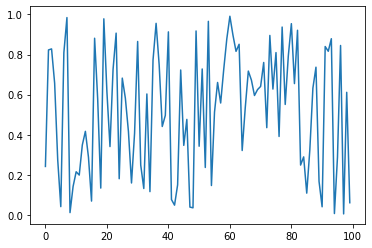

In [17]:
def generate_data(n, generator_type):
    ϵ_values = []
    for i in range(n):
        e = generator_type()
        ϵ_values.append(e)
    return ϵ_values

data = generate_data(100, np.random.uniform)
plt.plot(data)
plt.show()

Now, when we call the function `generate_data()`, we pass `np.random.uniform`
as the second argument.

This object is a *function*.

When the function call  `generate_data(100, np.random.uniform)` is executed, Python runs the function code block with `n` equal to 100 and the name `generator_type` "bound" to the function `np.random.uniform`.

* While these lines are executed, the names `generator_type` and `np.random.uniform` are "synonyms", and can be used in identical ways.

This principle works more generally---for example, consider the following piece of code

In [18]:
max(7, 2, 4)   # max() is a built-in Python function

7

In [19]:
m = max
m(7, 2, 4)

7

Here we created another name for the built-in function `max()`, which could
then be used in identical ways.

In the context of our program, the ability to bind new names to functions
means that there is no problem *passing a function as an argument to another
function*---as we did above.

## Exercises

### Exercise 1

Recall that $n!$ is read as "$n$ factorial" and defined as
$n! = n \times (n - 1) \times \cdots \times 2 \times 1$.

There are functions to compute this in various modules, but let's
write our own version as an exercise.

In particular, write a function `factorial` such that `factorial(n)` returns $n!$
for any positive integer $n$.

### Exercise 2

The [binomial random variable](https://en.wikipedia.org/wiki/Binomial_distribution) $Y \sim Bin(n, p)$ represents the number of successes in $n$ binary trials, where each trial succeeds with probability $p$.

Without any import besides `from numpy.random import uniform`, write a function
`binomial_rv` such that `binomial_rv(n, p)` generates one draw of $Y$.

Hint: If $U$ is uniform on $(0, 1)$ and $p \in (0,1)$, then the expression `U < p` evaluates to `True` with probability $p$.

### Exercise 3

First, write a function that returns one realization of the following random device

1. Flip an unbiased coin 10 times.
1. If a head occurs `k` or more times consecutively within this sequence at least once, pay one dollar.
1. If not, pay nothing.

Second, write another function that does the same task except that the second rule of the above random device becomes

- If a head occurs `k` or more times within this sequence, pay one dollar.

Use no import besides `from numpy.random import uniform`.

## Solutions

### Exercise 1

Here's one solution.

In [20]:
def factorial(n):
    k = 1
    for i in range(n):
        k = k * (i + 1)
    return k

factorial(4)

24

### Exercise 2

In [21]:
from numpy.random import uniform

def binomial_rv(n, p):
    count = 0
    for i in range(n):
        U = uniform()
        if U < p:
            count = count + 1    # Or count += 1
    return count

binomial_rv(10, 0.5)

6

### Exercise 3

Here's a function for the first random device.

In [22]:
from numpy.random import uniform

def draw(k):  # pays if k consecutive successes in a sequence

    payoff = 0
    count = 0

    for i in range(10):
        U = uniform()
        count = count + 1 if U < 0.5 else 0
        print(count)    # print counts for clarity
        if count == k:
            payoff = 1

    return payoff

draw(3)

1
2
0
1
0
1
2
0
1
0


0

Here's another function for the second random device.

In [23]:
def draw_new(k):  # pays if k successes in a sequence

    payoff = 0
    count = 0

    for i in range(10):
        U = uniform()
        count = count + ( 1 if U < 0.5 else 0 )
        print(count)
        if count == k:
            payoff = 1

    return payoff

draw_new(3)

1
2
2
3
4
5
5
6
6
7


1